In [234]:
import pandas as pd
import numpy as np

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df= pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [238]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [239]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [240]:
df.dropna(inplace=True)

In [241]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [242]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [243]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [244]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [245]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst =True)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [247]:
df["Age"] = 2026 - df["Year_Birth"]

In [248]:
df["Age"]

0       69
1       72
2       61
3       42
4       45
        ..
2235    59
2236    80
2237    45
2238    70
2239    72
Name: Age, Length: 2216, dtype: int64

In [249]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,42
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,45


In [250]:
df["Total_children"] = df["Kidhome"] + df["Teenhome"]

In [251]:
df["Total_children"].head()

0    0
1    2
2    0
3    1
4    1
Name: Total_children, dtype: int64

In [252]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children'],
      dtype='object')

In [253]:
spend_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts']

In [254]:
df["Total_spending"] = df[spend_cols].sum(axis=1)

In [255]:
df["Total_spending"].head(10)

0    1529
1      21
2     734
3      48
4     407
5     702
6     563
7     146
8      44
9      36
Name: Total_spending, dtype: int64

In [256]:
df["Customers_Since"]= (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [257]:
df["Customers_Since"]

0       4873
1       4323
2       4522
3       4349
4       4371
        ... 
2235    4591
2236    4229
2237    4365
2238    4366
2239    4832
Name: Customers_Since, Length: 2216, dtype: int64

Text(0.5, 1.0, 'Age distribution')

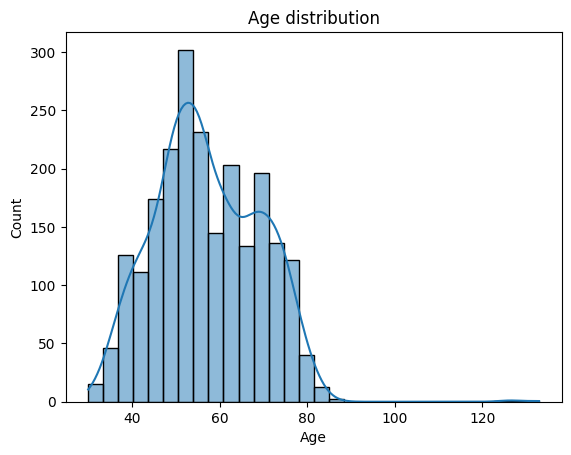

In [258]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age distribution")

Text(0.5, 1.0, 'Income Distribution')

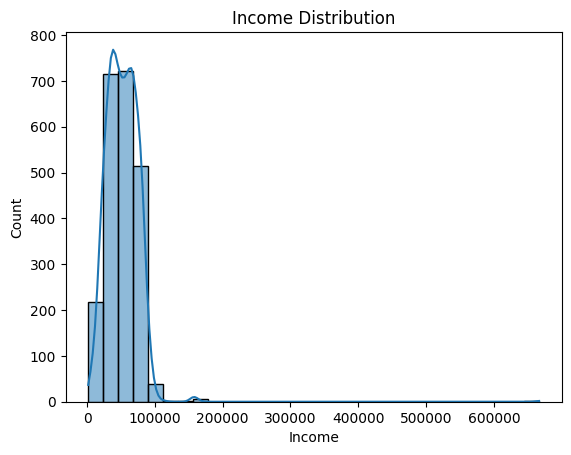

In [259]:
sns.histplot(df["Income"],bins=30,kde=True)
plt.title("Income Distribution")

Text(0.5, 1.0, 'Total Spending Distribution')

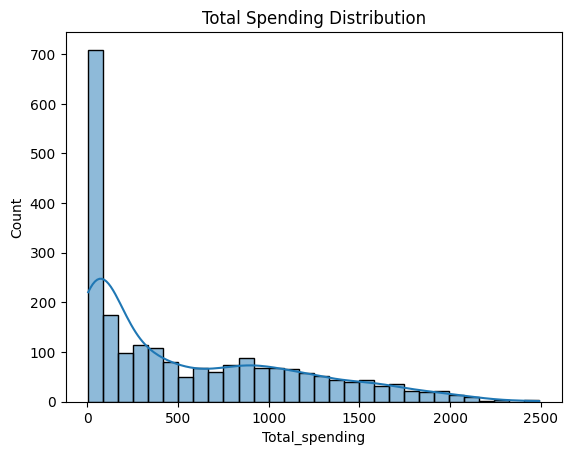

In [260]:
sns.histplot(df["Total_spending"], kde=True, bins=30)
plt.title("Total Spending Distribution")

Text(0.5, 1.0, 'Income by Education Level')

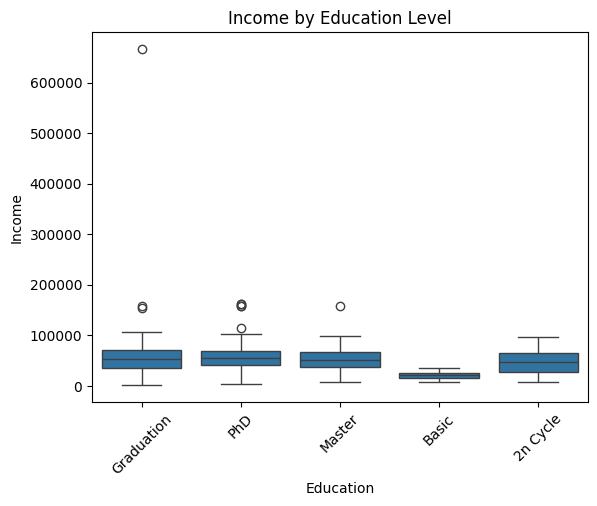

In [261]:
sns.boxplot(x="Education", y="Income", data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")

Text(0.5, 1.0, 'Spending by Marital Status')

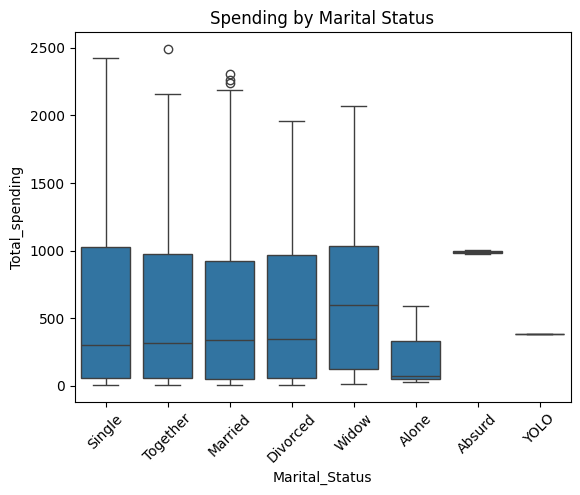

In [262]:
sns.boxplot(x ="Marital_Status", y ="Total_spending", data=df)
plt.xticks(rotation=45)
plt.title("Spending by Marital Status")

In [263]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spending', 'Customers_Since'],
      dtype='object')

In [264]:
corr = df[['Income','Age','Recency','Total_spending','NumWebPurchases','NumStorePurchases']].corr()

In [265]:
corr

,Income,Age,Recency,Total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.668062,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.112779,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.019374,-0.005641,-0.000434
Total_spending,0.668062,0.112779,0.019374,1.000000,0.515999,0.670327
NumWebPurchases,0.387878,0.153051,-0.005641,0.515999,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.670327,0.516240,1.000000


Text(0.5, 1.0, 'Correlation matrix')

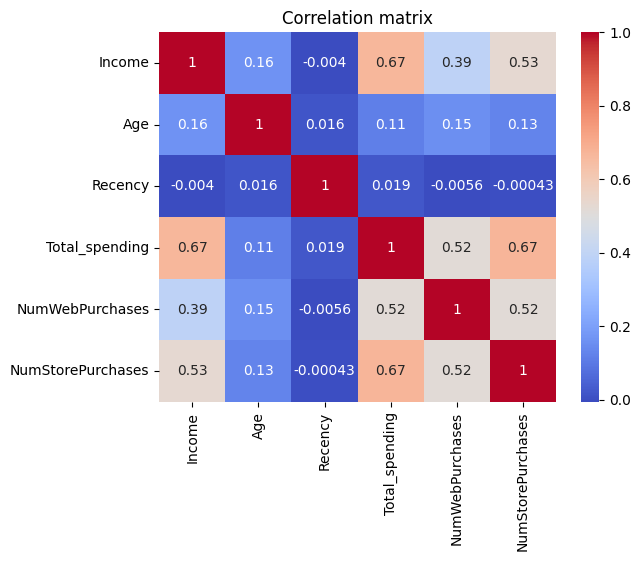

In [266]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")

In [267]:
pivot_income = df.pivot_table(values="Income",index="Education", columns="Marital_Status",aggfunc="mean")



In [268]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and marital Status')

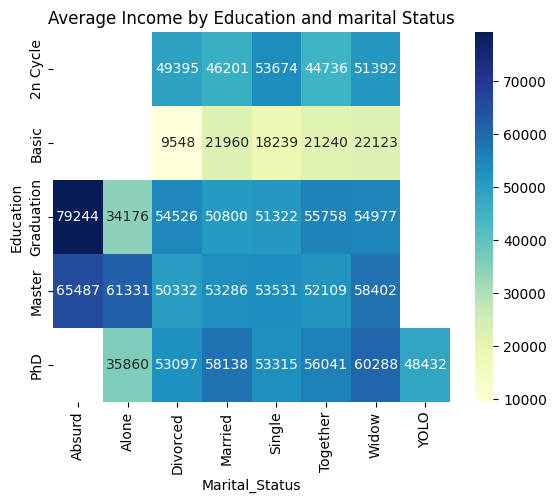

In [269]:
sns.heatmap(pivot_income, annot= True, fmt=".0f",cmap="YlGnBu")
plt.title("Average Income by Education and marital Status")

In [270]:
group1 =df.groupby("Education")["Total_spending"].mean().sort_values(ascending= False)

In [271]:
group1

Education
PhD           644.330561
Graduation    571.002688
Master        569.578082
2n Cycle      448.050000
Basic          58.962963
Name: Total_spending, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PhD'),
  Text(1, 0, 'Graduation'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

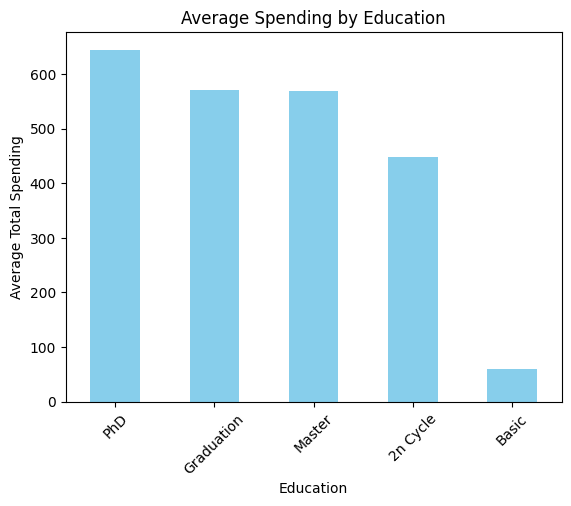

In [272]:
group1.plot(kind="bar",color="skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation=45)

In [273]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spending', 'Customers_Since'],
      dtype='object')

In [274]:
df["AcceptedAny"]= df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response']].sum(axis=1)

In [275]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [276]:
df["AcceptedAny"]=df["AcceptedAny"].apply(lambda x:1 if x>0 else 0)

In [277]:
df["AcceptedAny"].unique()

array([1, 0])

In [278]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [279]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

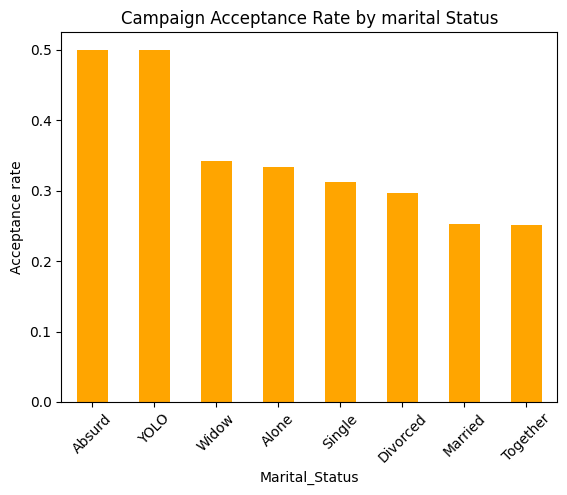

In [280]:
import matplotlib.pyplot as plt
group2.plot(kind="bar",color="orange")
plt.title("Campaign Acceptance Rate by marital Status")
plt.ylabel("Acceptance rate")
plt.xticks(rotation=45)
plt.show()


In [281]:
bins =[ 18, 30, 40,50,60,70,90]

In [282]:
labels = ["18-29","30-39","40-49","50-59","60-69","70+"]

In [283]:
df["AgeGroup"]= pd.cut(df["Age"], bins= bins, labels=labels)

In [284]:
df["AgeGroup"]

0       60-69
1         70+
2       60-69
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [285]:
group3 = df.groupby("AgeGroup")["Income"].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16832\1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


In [286]:
group3

AgeGroup
18-29    10960.500000
30-39    47905.475676
40-49    48057.587649
50-59    50479.321534
60-69    55980.030928
70+      58767.083102
Name: Income, dtype: float64

Text(0.5, 0, 'Average income')

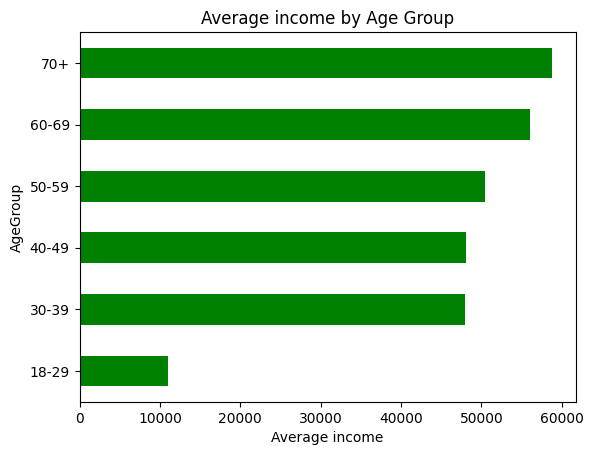

In [287]:
group3.plot(kind="barh",color="green")
plt.title("Average income by Age Group")
plt.xlabel("Average income")

In [288]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spending', 'Customers_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [289]:
features =["Age","Income","Total_spending","NumWebPurchases",'NumStorePurchases', 'NumWebVisitsMonth','Recency']

In [290]:
x= df[features].copy()

In [291]:
x

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,69,58138.0,1529,8,4,7,58
1,72,46344.0,21,1,2,5,38
2,61,71613.0,734,8,10,4,26
3,42,26646.0,48,2,4,6,26
4,45,58293.0,407,5,6,5,94
...,...,...,...,...,...,...,...
2235,59,61223.0,1094,9,4,5,46
2236,80,64014.0,436,8,5,7,56
2237,45,56981.0,1217,2,13,6,91
2238,70,69245.0,782,6,10,3,8


In [292]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


In [293]:
x_scaled = scaler.fit_transform(x)

In [294]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67383183, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.93944575, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.29614239, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.13315371, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.37932364, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7141632 , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [295]:
from sklearn.cluster import KMeans



In [296]:
wcss=[]

In [297]:

for i in range(2,10):
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [298]:
wcss

[15511.999999999998,
 15511.999999999998,
 15511.999999999998,
 15511.999999999998,
 15511.999999999998,
 15511.999999999998,
 15511.999999999998,
 15511.999999999998]

Text(0, 0.5, 'WCSS')

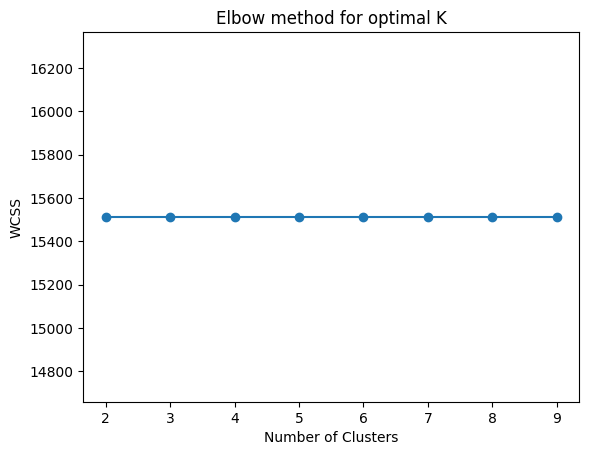

In [299]:
plt.plot(range(2,10),wcss, marker="o")
plt.title("Elbow method for optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [300]:
kmeans = KMeans(n_clusters=6)
df["Cluster"]= kmeans.fit_predict(x_scaled) 

In [301]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_children,Total_spending,Customers_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,69,0,1529,4873,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,72,2,21,4323,0,70+,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,61,0,734,4522,0,60-69,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,42,1,48,4349,0,40-49,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,45,1,407,4371,0,40-49,4


In [302]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [303]:
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,53.709302,78589.306202,1190.387597,4.740310,8.635659,2.806202,19.790698
1,56.096154,35930.603846,108.373077,2.401923,3.419231,6.484615,75.442308
2,52.883636,33620.616364,86.780000,2.080000,3.201818,6.543636,25.218182
3,61.997409,57591.176166,749.318653,7.880829,7.316062,6.588083,41.898964
4,49.317992,71593.803347,1169.175732,5.338912,9.322176,3.623431,74.945607
5,71.783270,72195.825095,1018.931559,4.254753,7.741445,2.596958,62.057034


In [304]:
df["Cluster"].value_counts()

Cluster
2    550
1    520
3    386
5    263
0    258
4    239
Name: count, dtype: int64

In [305]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0],pca_data[:,1]

In [306]:
pca_data

array([[ 1.10135609, -0.2069141 ],
       [-1.32167074,  0.25367219],
       [ 1.88954561, -1.01981532],
       ...,
       [ 1.19483713,  1.16409974],
       [ 1.88280934, -1.17528269],
       [-0.83687269, -0.17102343]], shape=(2216, 2))

In [307]:
df["PCA1"]

0       1.101356
1      -1.321671
2       1.889546
3      -1.770520
4       0.038601
          ...   
2235    1.092970
2236    0.532004
2237    1.194837
2238    1.882809
2239   -0.836873
Name: PCA1, Length: 2216, dtype: float64

Text(0.5, 1.0, 'Customer Segmentation (PCA)')

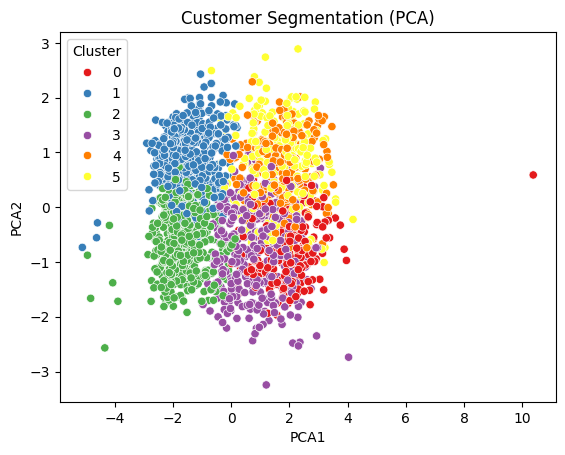

In [308]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data= df, palette="Set1")
plt.title("Customer Segmentation (PCA)")

In [309]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']